In [1]:
import numpy as np
import random
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%mkdir dataset
!cp '/content/drive/MyDrive/rdr_nomap_browse.zip' dataset/
%cd dataset

/content/dataset


In [5]:
# !cp rdr_nomap_browse.zip dataset/

In [6]:
!unzip -q rdr_nomap_browse.zip 
%cd rdr_nomap_browse

/content/dataset/rdr_nomap_browse


In [7]:
import os
import random
from skimage import io
from collections import Counter
import matplotlib as plt
import pandas as pd

path = '/content/dataset/rdr_nomap_browse'
data = '/content/dataset/rdr_nomap_browse/manifest.csv'
path_dusty = '/content/dataset/rdr_nomap_browse/dusty'
path_not_dusty = '/content/dataset/rdr_nomap_browse/not_dusty'

df = pd.read_csv(data)
os.listdir(path_dusty)
path

'/content/dataset/rdr_nomap_browse'

In [8]:
df.sample(10)

,#dataset,id,label
3406,train,004439_PSP_004353_0935_r9095_c1331,dusty
2419,train,003385_PSP_004300_1455_r7378_c614,dusty
4043,train,001699_PSP_004330_1410_r399_c922,dusty
4101,train,009588_PSP_004326_1525_r5624_c819,dusty
10839,validation,008430_PSP_004431_1400_r506_c1946,dusty
4325,train,007811_PSP_004326_1525_r1649_c1536,dusty
3488,train,004014_PSP_004390_1035_r1083_c1946,dusty
10119,validation,009615_PSP_004509_1890_r8932_c410,dusty
6951,train,002273_ESP_012216_1705_r4153_c717,not_dusty
656,train,006069_PSP_004326_1525_r2381_c819,dusty


In [9]:
Xtrain_list = []
Ytrain_list = []

for i in df.index:
  if df['#dataset'][i] == 'train' and df['label'][i] == 'not_dusty':
    Xtrain_list.append({'id':df['id'][i]})
    Ytrain_list.append({'label':df['label'][i]})

In [10]:
Xarrhist = []

for i in df.index:
  if df['#dataset'][i] == 'train' and df['label'][i] == 'dusty':
    Xarrhist.append({'id':df['id'][i]})

hist_arr = []

curr_dir = os.getcwd()

for x in Xarrhist:
  hist_arr.append(io.imread(curr_dir + '/' + 'dusty' + '/' + x['id'] + '.png'))

In [11]:
from skimage import io

# p = '/content/dataset/rdr_nomap_browse/not_dusty/'

Xtrain = []

curr_dir = os.getcwd()

for x in Xtrain_list:
  Xtrain.append(io.imread(curr_dir + '/' + 'not_dusty' + '/' + x['id'] + '.png'))

In [12]:
from collections import Counter
print(len(Xtrain))

4961


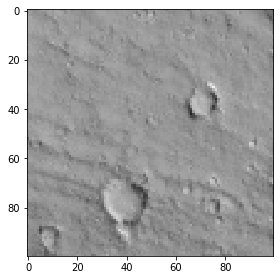

In [13]:
io.imshow(Xtrain[4000])

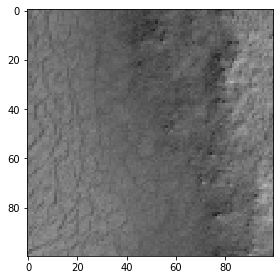

In [14]:
io.imshow(Xtrain[1102])

In [15]:
norm = np.max(Xtrain)-np.min(Xtrain)
for i in range(len(Xtrain)):
  Xtrain[i] = Xtrain[i]/norm

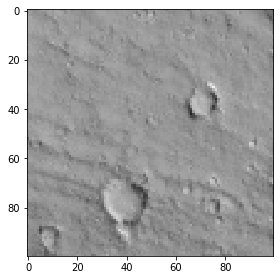

In [16]:
io.imshow(Xtrain[4000])

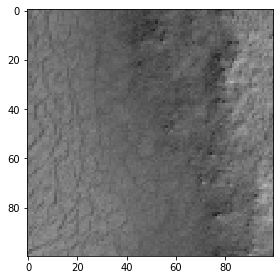

In [17]:
io.imshow(Xtrain[1102])

In [18]:
import random
import cv2

def add_noise_prm(img, l, h):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between l and h
	number_of_pixels = random.randint(l, h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 205-255
		img[y_coord][x_coord] = np.random.randint(175,255)
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between l and h
	number_of_pixels = random.randint(l , h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 0-50
		img[y_coord][x_coord] = np.random.randint(125,205)
		
	return img

In [19]:
def add_noise_prm_mod(img, l, h):

	# Getting the dimensions of the image
	row , col = img.shape
	
	# Randomly pick some pixels in the
	# image for coloring them white
	# Pick a random number between l and h
	number_of_pixels = random.randint(l, h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 145-220
		img[y_coord][x_coord] = np.random.randint(145,220)
		
	# Randomly pick some pixels in
	# the image for coloring them black
	# Pick a random number between l and h
	number_of_pixels = random.randint(l , h)
	for i in range(number_of_pixels):
	
		# Pick a random y coordinate
		y_coord=random.randint(0, row - 1)
		
		# Pick a random x coordinate
		x_coord=random.randint(0, col - 1)
		
		# Color that pixel to 80-145
		img[y_coord][x_coord] = np.random.randint(80,145)
		
	return img

In [20]:
from skimage import img_as_ubyte

NoisyX= []

for x in Xtrain:
  img = img_as_ubyte(x)
  img = add_noise_prm_mod(img,3000,4000)
  NoisyX.append(img)

In [21]:
NoisyX[0].shape

(100, 100)

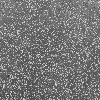

In [22]:
from google.colab.patches import cv2_imshow
cv2_imshow(NoisyX[3])

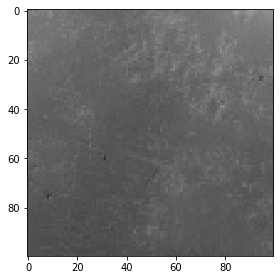

In [23]:
io.imshow(Xtrain[3])

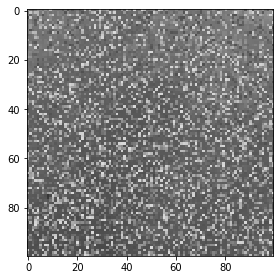

In [24]:
io.imshow(NoisyX[3])

In [25]:
X_train = np.array(Xtrain)
NoisyX = np.array(NoisyX)

In [26]:
X_train = X_train.reshape(len(X_train),100,100,1)
NoisyX = NoisyX.reshape(len(NoisyX),100,100,1)
X_train.shape

(4961, 100, 100, 1)

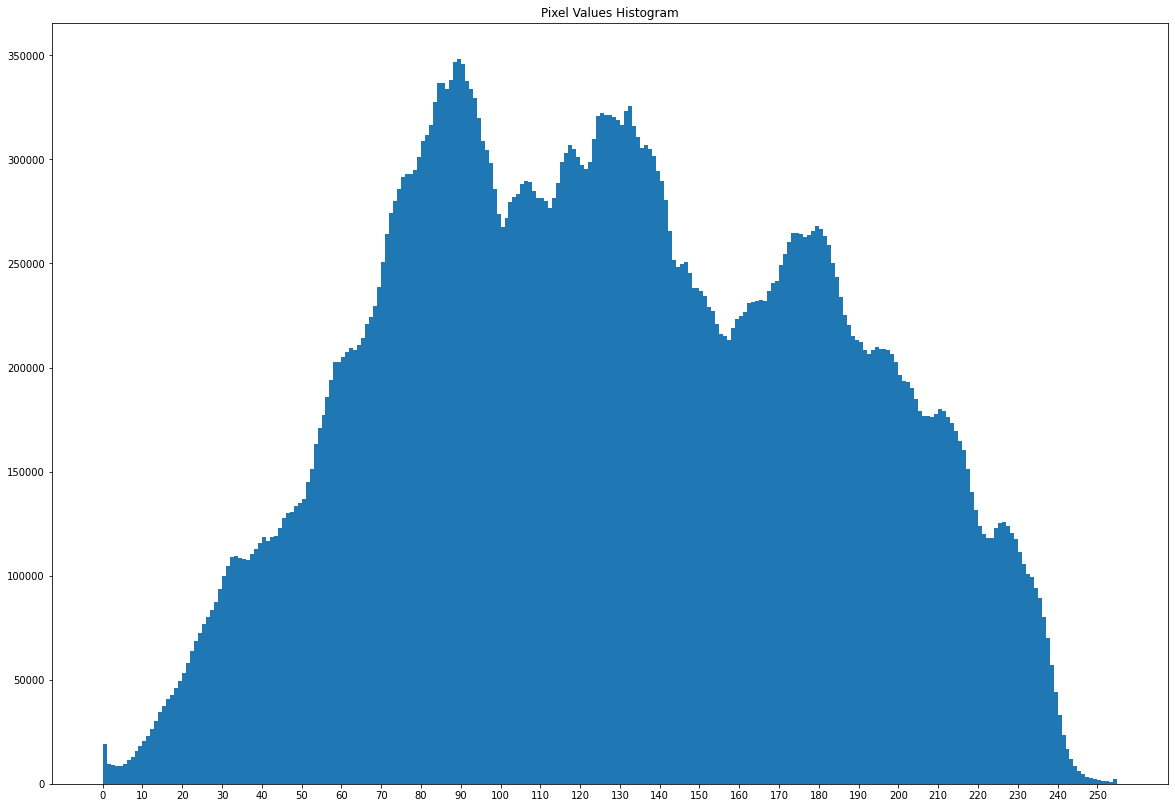

In [27]:
import matplotlib.pyplot as plt

hist_arr = np.array(hist_arr)

c = hist_arr.flat
c = np.array(list(c))

fig = plt.figure(figsize =(20, 14))

plt.xticks(np.arange(0,255,10))
 
plt.hist(c,bins=255)
 
plt.title("Pixel Values Histogram")
 
# show plot
plt.show()

In [28]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [29]:
# input = layers.Input(shape=(100, 100, 1))

# # Encoder
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)
# x = layers.Conv2D(32, (3, 3), activation="relu")(x)
# x = layers.MaxPooling2D((2, 2), padding="same")(x)

# # Decoder
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
# x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# # Autoencoder
# autoencoder = Model(input, x)
# autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
# autoencoder.summary()

In [30]:
input = layers.Input(shape=(100, 100, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 50, 50, 32)       9248  

In [31]:
autoencoder.fit(
    x=X_train,
    y=X_train,
    epochs=250,
    batch_size=64,
    shuffle=True
)

Epoch 1/250
78/78 [==============================] - 13s 45ms/step - loss: 0.6505
Epoch 2/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6205
Epoch 3/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6193
Epoch 4/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6189
Epoch 5/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6185
Epoch 6/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6183
Epoch 7/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6181
Epoch 8/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6179
Epoch 9/250
78/78 [==============================] - 3s 43ms/step - loss: 0.6178
Epoch 10/250
78/78 [==============================] - 3s 42ms/step - loss: 0.6178
Epoch 11/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6177
Epoch 12/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6177
Epoch 13/250
78/78 [====

In [32]:
predictions = autoencoder.predict(X_train)

156/156 [==============================] - 2s 9ms/step


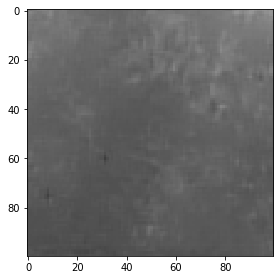

In [33]:
preds = predictions[3].reshape(100,100)
io.imshow(preds, cmap='gray')

In [34]:
preds.shape

(100, 100)

In [35]:
autoencoder.fit(
    x=NoisyX,
    y=X_train,
    epochs=250,
    batch_size=64,
    shuffle=True
)

Epoch 1/250
78/78 [==============================] - 3s 41ms/step - loss: 9.0237
Epoch 2/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6881
Epoch 3/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6880
Epoch 4/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 5/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 6/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 7/250
78/78 [==============================] - 3s 41ms/step - loss: 0.6879
Epoch 8/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 9/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 10/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 11/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 12/250
78/78 [==============================] - 3s 40ms/step - loss: 0.6879
Epoch 13/250
78/78 [=====

In [36]:
predictions_n = autoencoder.predict(NoisyX)

156/156 [==============================] - 1s 9ms/step


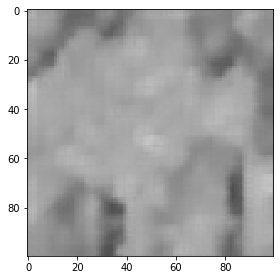

In [37]:
preds_n = predictions_n[100].reshape(100,100)
io.imshow(preds_n,cmap='gray')

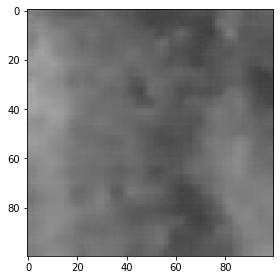

In [38]:
# i =10 
temp = predictions_n[6].reshape(100,100)
io.imshow(temp,cmap='gray')
io.imsave('b1.png',img_as_ubyte(temp))

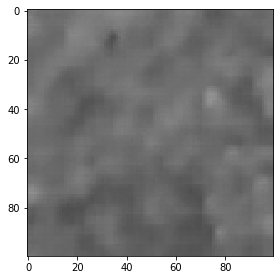

In [39]:
from PIL import Image
pil_arr = []
for i in range(len(predictions_n)):
  v = predictions_n[i].reshape(100,100)
  io.imshow(v)
  break
  #pil_arr.append(v)

In [40]:
from PIL import Image
pil_arr_train = []
for x in Xtrain:
  v = x.reshape(100,100)
  pil_arr_train.append(v)

In [41]:
from PIL import Image
pil_arr_noise = []
for x in NoisyX:
  v = x.reshape(100,100)
  pil_arr_noise.append(v)

In [42]:
pil_arr = pil_arr[0:20]
pil_arr_train = pil_arr_train[0:20]
pil_arr_Noisy = pil_arr_noise[0:20]

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


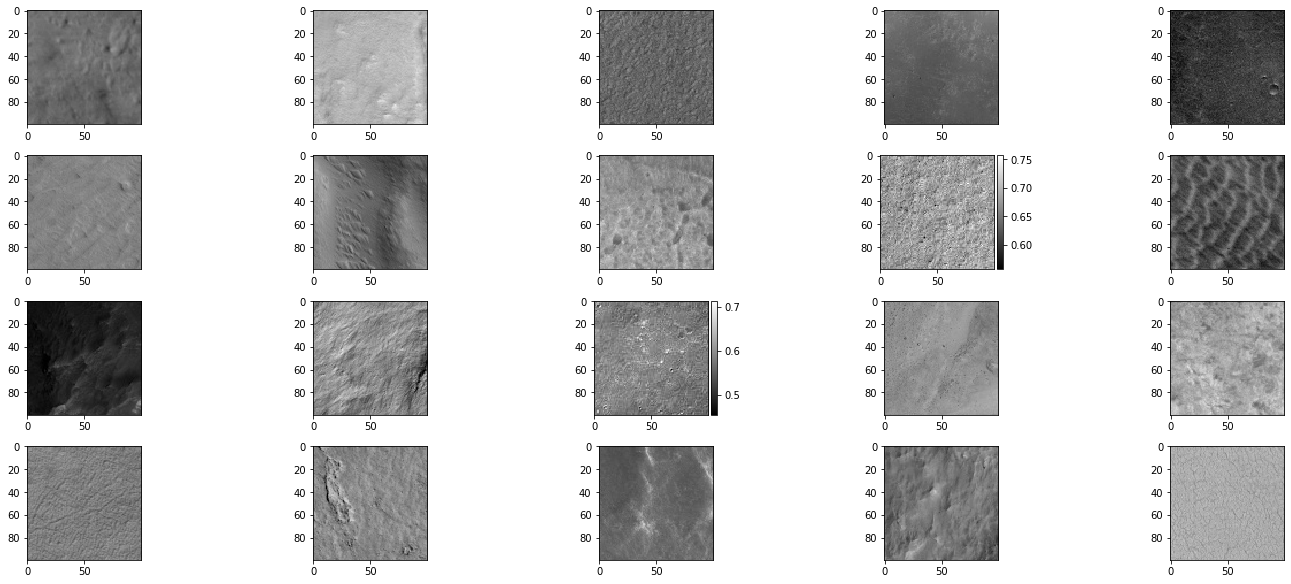

In [43]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_train):
  plt.subplot(len(pil_arr_train) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

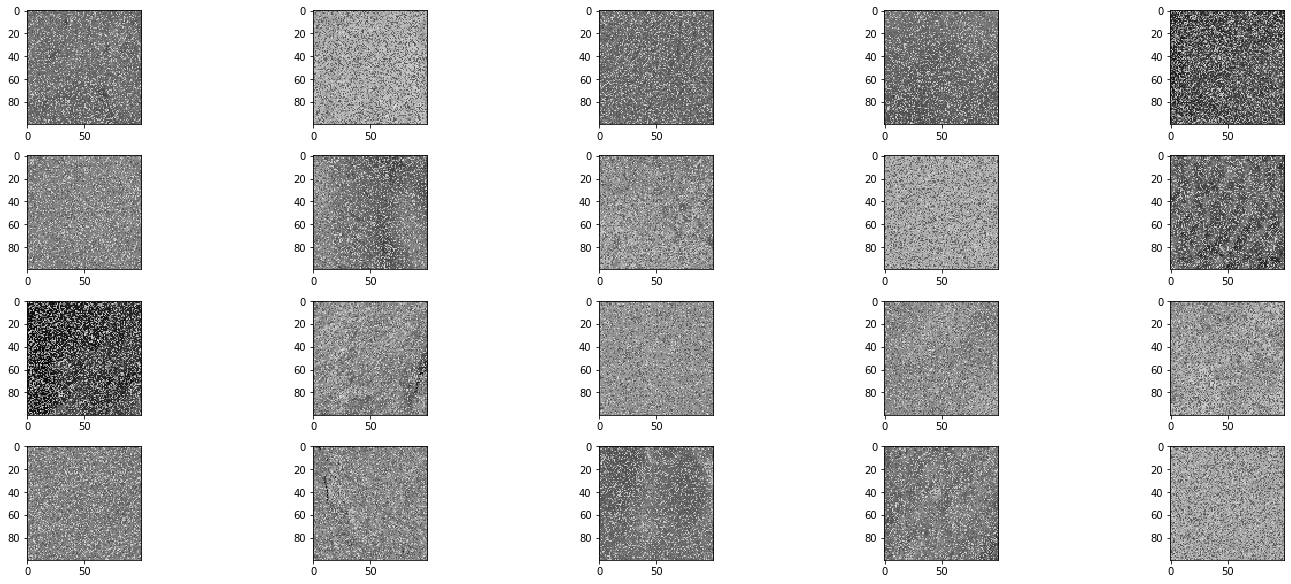

In [44]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_Noisy):
  plt.subplot(len(pil_arr_Noisy) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

In [45]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr):
  plt.subplot(len(pil_arr) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

<Figure size 1440x720 with 0 Axes>

In [46]:
import cv2
from skimage import img_as_ubyte

XtrainRs = []

for i in range(len(Xtrain)):
  res = cv2.resize(Xtrain[i], dsize=(128, 128), interpolation=cv2.INTER_LINEAR)
  XtrainRs.append(res)

NoisyXrs= []

for x in XtrainRs:
  img = img_as_ubyte(x)
  img = add_noise_prm(img,3000,4000)
  NoisyXrs.append(img)

X_trainRs = np.array(XtrainRs)
NoisyXrs = np.array(NoisyXrs)
X_trainRs = X_trainRs.reshape(len(X_trainRs),128,128,1)
NoisyXrs = NoisyXrs.reshape(len(NoisyXrs),128,128,1)
X_trainRs.shape

(4961, 128, 128, 1)

In [47]:
input = layers.Input(shape=(128, 128, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder_rs = Model(input, x)
autoencoder_rs.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder_rs.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248

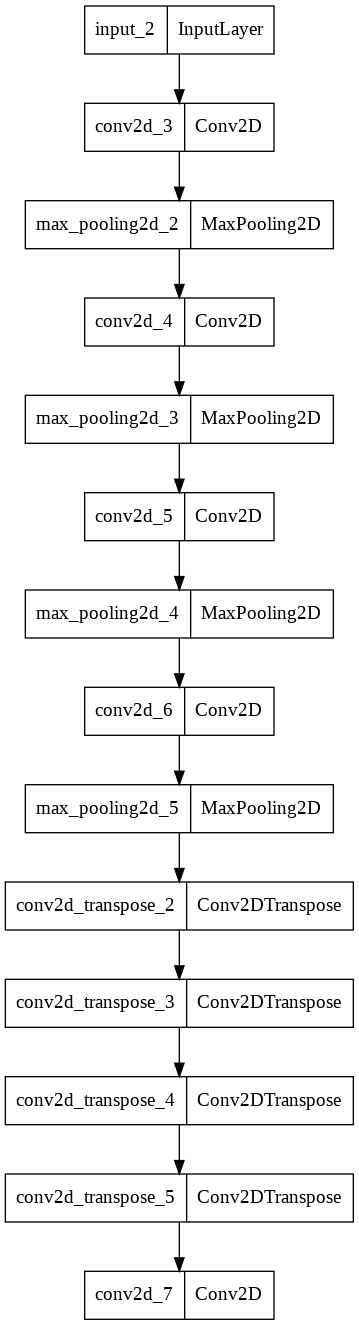

In [48]:
tf.keras.utils.plot_model(
    autoencoder_rs,
    to_file='aers.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False
)

In [49]:
autoencoder_rs.fit(
    x=NoisyXrs,
    y=X_trainRs,
    epochs=250,
    batch_size=64,
    shuffle=True
)

Epoch 1/250
78/78 [==============================] - 7s 68ms/step - loss: 0.6451
Epoch 2/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6274
Epoch 3/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6265
Epoch 4/250
78/78 [==============================] - 5s 63ms/step - loss: 0.6249
Epoch 5/250
78/78 [==============================] - 5s 63ms/step - loss: 0.6246
Epoch 6/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6243
Epoch 7/250
78/78 [==============================] - 5s 63ms/step - loss: 0.6240
Epoch 8/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6238
Epoch 9/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6235
Epoch 10/250
78/78 [==============================] - 5s 62ms/step - loss: 0.6234
Epoch 11/250
78/78 [==============================] - 5s 61ms/step - loss: 0.6231
Epoch 12/250
78/78 [==============================] - 5s 61ms/step - loss: 0.6235
Epoch 13/250
78/78 [=====

156/156 [==============================] - 2s 13ms/step


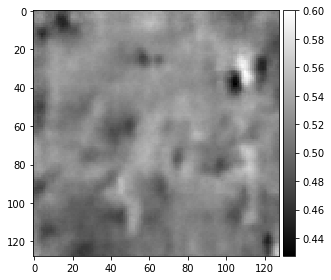

In [50]:
predictions_xrs = autoencoder_rs.predict(NoisyXrs)
preds_xrs = predictions_xrs[5].reshape(128,128)
io.imshow(preds_xrs, cmap='gray')

In [51]:
from PIL import Image
pil_arr_rs = []
for x in predictions_xrs:
  v = x.reshape(128,128)
  pil_arr_rs.append(v)


from PIL import Image
pil_arr_train_xrs = []
for x in XtrainRs:
  v = x.reshape(128,128)
  pil_arr_train_xrs.append(v)


from PIL import Image
pil_arr_noise_xrs = []
for x in NoisyXrs:
  v = x.reshape(128,128)
  pil_arr_noise_xrs.append(v)

pil_arr_xrs = pil_arr_rs[0:20]
pil_arr_train_xrs = pil_arr_train_xrs[0:20]
pil_arr_noise_xrs = pil_arr_noise_xrs[0:20]

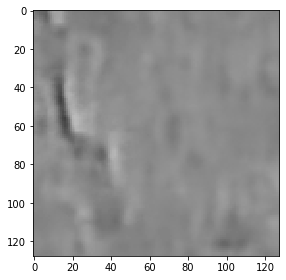

In [52]:
i = io.imshow(pil_arr_xrs[16],cmap='gray')
io.imsave('i6.png',pil_arr_noise_xrs[16])

In [53]:
!pwd

/content/dataset/rdr_nomap_browse


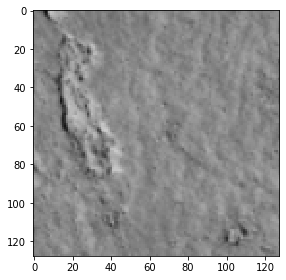

In [54]:
io.imshow(pil_arr_train_xrs[16],cmap='gray')

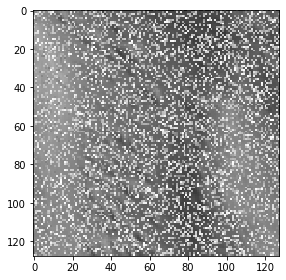

In [55]:
io.imshow(pil_arr_noise_xrs[6],cmap='gray')

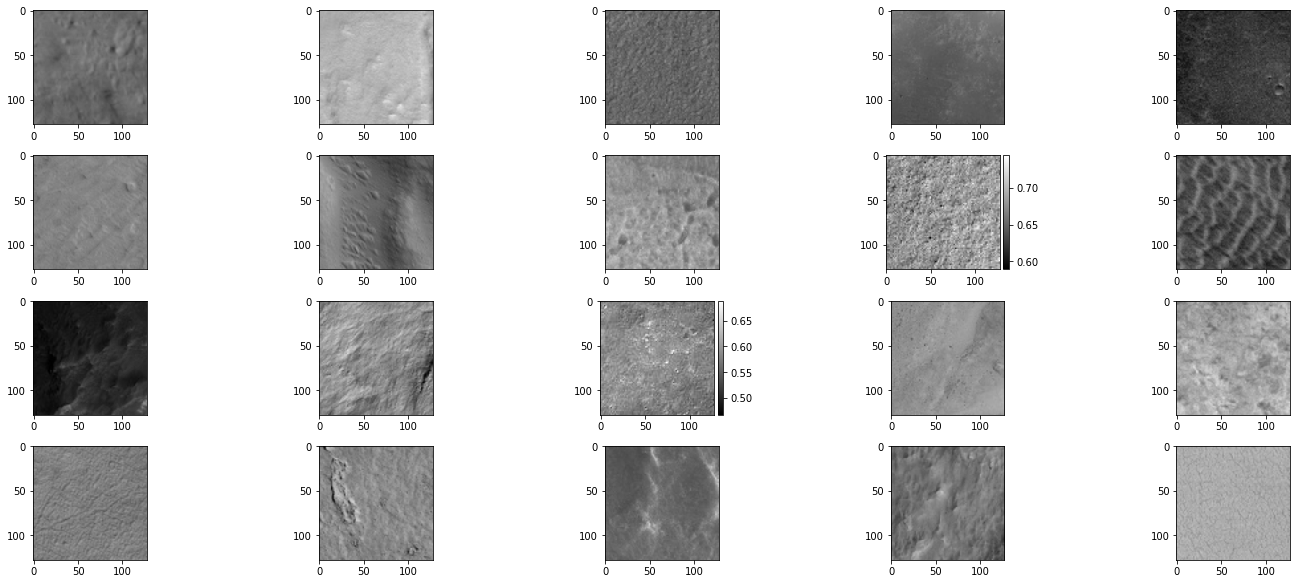

In [56]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_train_xrs):
  plt.subplot(len(pil_arr_train_xrs) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

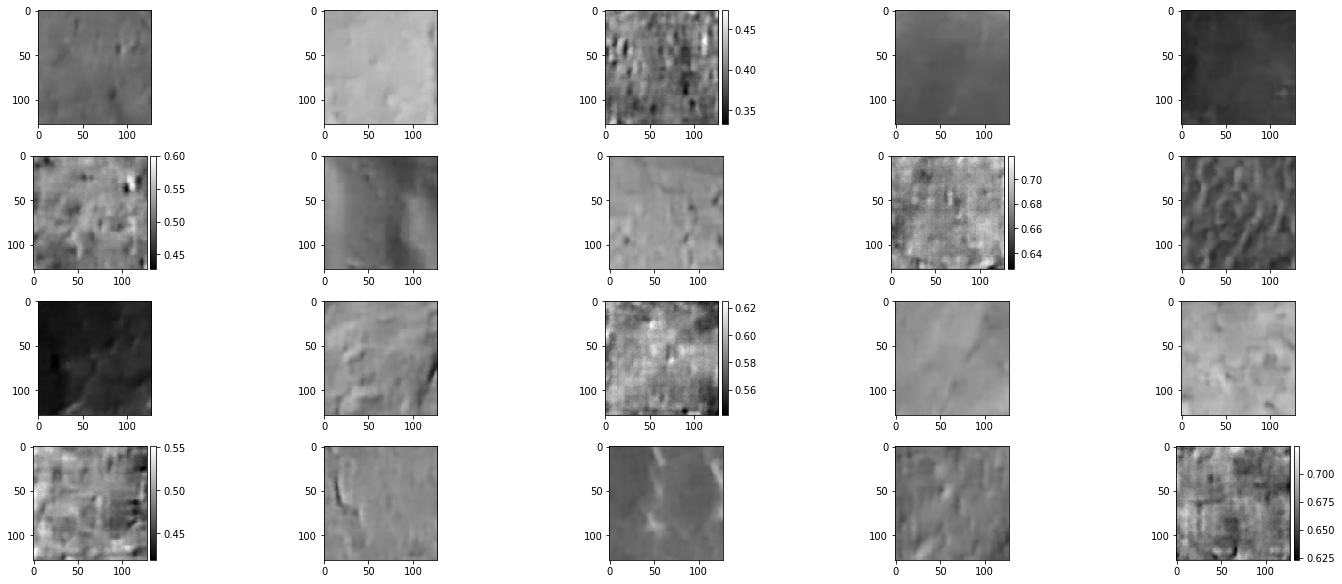

In [57]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_xrs):
  plt.subplot(len(pil_arr_xrs) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')

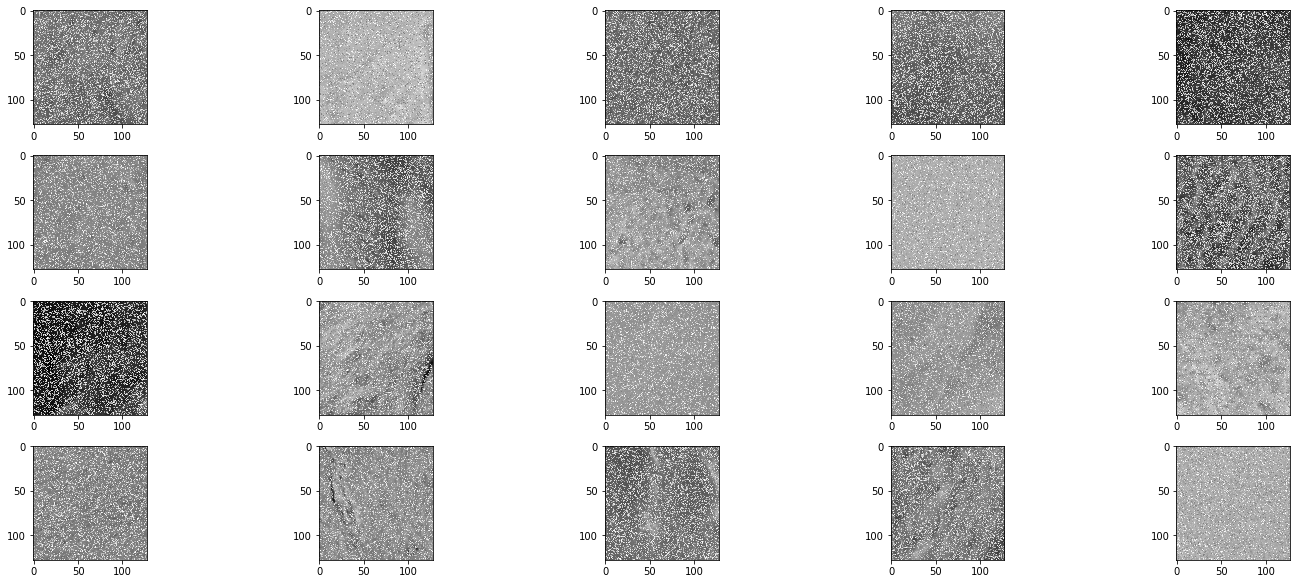

In [58]:
plt.figure(figsize=(20,10))
columns = 5

for i, image in enumerate(pil_arr_noise_xrs):
  plt.subplot(len(pil_arr_noise_xrs) / columns + 1, columns, i + 1)
  io.imshow(image, cmap='gray')